# BA Ecobici - Modelo de Predicción de Duración de un Viaje 

Para el siguiente trabajo utilizaremos datos públicos del sistema de Ecobicis de la Ciudad Autónoma de Buenos Aires, disponibles en https://data.buenosaires.gob.ar/. Partiendo de datasets que contienen información de cada uno de los viajes realizados utilizando el sistema de Ecobicis, y agregando a los mismos información relevante sobre el usuario o viajante, buscaremos analizar algunos de los aspectos más relevantes del servicio, tales como la evolución de la cantidad de viajes a lo largo del tiempo, las principales estaciones y la distribución de la duración de los viajes, entre otras. Una vez analizado el contexto de los datos, armaremos un modelo que intente predecir la duración de un viaje en Ecobici basado en las condiciones en las que se realizó el mismo. 



In [1]:
#Importamos las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image

In [2]:
#Importamos los dataset de ciudad de buenos aires de recorridos 2018, 2019 y 2020
#recorridos2018 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\recorridos-realizados-2018.csv', delimiter=',',low_memory=False)
#recorridos2019 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\recorridos-realizados-2019.csv', delimiter=',',low_memory=False)
#recorridos2020 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\recorridos-realizados-2020.csv', delimiter=',',low_memory=False)
recorridos2018 = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp2\recorridos-realizados-2018.csv', delimiter=',')
recorridos2019 = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp\recorridos-realizados-2019 (1).csv', delimiter=',')
recorridos2020 = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp\recorridos-realizados-2020.csv', delimiter=',')

C:\Users\Milagros\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,2,4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Vamos a ver las features del dataset 2018
recorridos2018

,id_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,long_estacion_origen,lat_estacion_origen,domicilio_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,long_estacion_destino,lat_estacion_destino,domicilio_estacion_destino
0,5453,M,2018-01-01 00:08:05,45.0,Uruguay,-58.386913,-34.601616,Tucumán y Uruguay,0 days 00:19:53.000000000,2018-01-01 00:27:58,183.0,Virrey Cevallos,-58.389692,-34.615638,México 1652 entre Virrey Cevallos y Solís
1,673,M,2018-01-01 00:18:05,189.0,Posadas,-58.385586,-34.588475,Posadas 1350 entre Montevideo y Rodríguez Peña,0 days 00:26:19.000000000,2018-01-01 00:44:24,110.0,Guardia Vieja,-58.415459,-34.601761,Guardia Vieja 3606 entre Billinghurst y Mario ...
2,179119,F,2018-01-01 00:20:14,50.0,Hospital Rivadavia,-58.401148,-34.583677,Lucena Pereyra 2516 entre Las Heras y Pagano,0 days 00:27:39.000000000,2018-01-01 00:47:53,31.0,Padilla,-58.439709,-34.603162,Padilla y Warnes Av
3,400147,M,2018-01-01 00:20:22,111.0,Macacha Güemes,-58.363000,-34.604969,Macacha Guemes y Juana Manso,0 days 00:48:51.000000000,2018-01-01 01:09:13,54.0,Acuña de Figueroa,-58.421705,-34.598222,Lavalle y Acuña de Figueroa
4,400156,F,2018-01-01 00:20:31,111.0,Macacha Güemes,-58.363000,-34.604969,Macacha Guemes y Juana Manso,0 days 00:49:27.000000000,2018-01-01 01:09:58,54.0,Acuña de Figueroa,-58.421705,-34.598222,Lavalle y Acuña de Figueroa
5,476733,F,2018-01-01 00:21:01,121.0,Yatay,-58.428268,-34.600818,Yatay 925 entre Humahuaca y Guardia Vieja,0 days 00:36:10.000000000,2018-01-01 00:57:11,143.0,Billinghurst y Valentín Gomez,-58.415759,-34.604635,Billinghurst 455 y Valentín Gomez
6,326932,F,2018-01-01 00:21:30,121.0,Yatay,-58.428268,-34.600818,Yatay 925 entre Humahuaca y Guardia Vieja,0 days 00:35:31.000000000,2018-01-01 00:57:01,143.0,Billinghurst y Valentín Gomez,-58.415759,-34.604635,Billinghurst 455 y Valentín Gomez
7,347609,M,2018-01-01 00:22:48,155.0,Parque José Evaristo Uriburu,-58.412559,-34.641728,Pque. José E. Uriburu - Almafuerte 300,0 days 00:31:07.000000000,2018-01-01 00:53:55,71.0,Cerrito,-58.382843,-34.602996,Av. Roque Saenz Peña 1149 entre Libertad y Cer...
8,392077,F,2018-01-01 00:23:46,7.0,Obelisco,-58.380990,-34.605840,Av. 9 de Julio y Tte. Gral Juan Domingo Perón,0 days 00:34:28.000000000,2018-01-01 00:58:14,79.0,Azucena Villaflor,-58.363969,-34.611721,Azucena Villaflor y Pierina Dealessi
9,457895,F,2018-01-01 00:24:19,7.0,Obelisco,-58.380990,-34.605840,Av. 9 de Julio y Tte. Gral Juan Domingo Perón,0 days 00:17:08.000000000,2018-01-01 00:41:27,47.0,Colegio Nacional Buenos Aires,-58.373557,-34.610782,Bolivar entre Adolfo Alsina y Moreno


Como cada registro de la tabla representa un viaje, vemos que tenemos 2.619.698 viajes para el año 2018. Por cada uno de ellos tenemos información del id del usuario que realizó el viaje, su género, la fecha de origen del recorrido, el id o código identificatorio de la estación de origen, de esta última su nombre, la latitud y longitud de su ubicación y su domicilio; luego información de la duración del recorrido y fecha de finalización del viaje, disponiendo además de la misma información antes mencionada para la estación de destino del viaje. 

In [4]:
#Vamos a ver las features del dataset 2019
recorridos2019

,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,capacidad_estacion_origen,lat_estacion_origen,long_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,capacidad_estacion_destino,lat_estacion_destino,long_estacion_destino,servicio
0,115783_0,36.0,FEMENINO,2019-01-01 00:01:16,168.0,Estados Unidos,Estados Unidos y Lima,NaN,-34.618620,-58.381283,0 days 00:07:02.000000000,2019-01-01 00:08:18,112.0,9 de Julio,9 de Julio y Moreno,NaN,-34.612389,-58.380766,antiguo
1,345364_0,40.0,MASCULINO,2019-01-01 00:04:32,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,0 days 00:05:33.000000000,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,antiguo
2,570578_0,41.0,FEMENINO,2019-01-01 00:09:15,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,0 days 00:19:45.000000000,2019-01-01 00:29:00,44_0,Ecoparque,NaN,NaN,NaN,NaN,antiguo
3,588687_0,43.0,MASCULINO,2019-01-01 00:09:28,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,0 days 00:19:34.000000000,2019-01-01 00:29:02,44_0,Ecoparque,NaN,NaN,NaN,NaN,antiguo
4,127201_0,33.0,MASCULINO,2019-01-01 00:11:17,16.0,Legislatura,Perú y Diagonal Sur,NaN,-34.609959,-58.374717,0 days 00:21:32.000000000,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,Estados Unidos 3568 entre Boedo y Maza,NaN,-34.622439,-58.415882,antiguo
5,512531_0,26.0,MASCULINO,2019-01-01 00:15:25,102.0,Roseti,Roseti 50 y Av Dorrego,NaN,-34.586440,-58.445987,0 days 00:23:24.000000000,2019-01-01 00:38:49,142.0,Armenia y Gorriti,Armenia 1525 entre Gorriti y Honduras,NaN,-34.590554,-58.428888,antiguo
6,442410_0,37.0,FEMENINO,2019-01-01 00:22:16,185.0,Av Pavón y 33 Orientales,"33 Orientales 1439, entre Av. Pavón y Av. Garay",NaN,-34.631370,-58.421783,0 days 00:06:33.000000000,2019-01-01 00:28:49,140.0,Las Casas,Las Casas 3587 entre Av. Boedo y Alzaga,NaN,-34.635148,-58.415775,antiguo
7,224220_0,21.0,MASCULINO,2019-01-01 00:22:28,185.0,Av Pavón y 33 Orientales,"33 Orientales 1439, entre Av. Pavón y Av. Garay",NaN,-34.631370,-58.421783,0 days 00:06:42.000000000,2019-01-01 00:29:10,140.0,Las Casas,Las Casas 3587 entre Av. Boedo y Alzaga,NaN,-34.635148,-58.415775,antiguo
8,36652_0,48.0,MASCULINO,2019-01-01 00:24:02,129.0,Velasco,Velasco 285 entre Julián Álvarez y Lavalleja,NaN,-34.600165,-58.434955,0 days 00:28:58.000000000,2019-01-01 00:53:00,42.0,Diagonal Norte,Roque Sáenz Peña y Suipacha,NaN,-34.604642,-58.379652,antiguo
9,525344_0,29.0,MASCULINO,2019-01-01 00:33:54,167.0,Hipólito Yrigoyen,Hipolito Yrigoyen entre Muñiz y La Plata,NaN,-34.615064,-58.428781,0 days 00:24:12.000000000,2019-01-01 00:58:06,168.0,Estados Unidos,Estados Unidos y Lima,NaN,-34.618620,-58.381283,antiguo


El dataset de 2019 a grandes rasgos tiene la misma información que el de 2018, pero además tiene la edad del usuario, información sobre la capacidad de bicicletas de las estaciones de origen y destino y una columna llamada servicio. El dataset tiene 6 millones de registros, más del doble que el año anterior! Ya volveremos para analizar este punto. 

In [5]:
#Vamos a ver las features del dataset 2020
recorridos2020

,Unnamed: 0,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista
0,0,349,75,2020-09-14 11:52:21,075 - Plaza Primero de Mayo,2020-09-14 11:58:10,186.0,186 - MANZANA 66,155721
1,1,85,210,2020-09-14 11:51:41,335 - General Urquiza,2020-09-14 11:53:06,210.0,335 - General Urquiza,191320
2,2,311,213,2020-09-14 11:51:12,136 - Acevedo,2020-09-14 11:56:23,99.0,099 - Malabia,86663
3,3,454,156,2020-09-14 11:50:38,156 - Plaza Alemania,2020-09-14 11:58:12,222.0,160 - Godoy Cruz y Libertador,193914
4,4,195,24,2020-09-14 11:49:31,024 - ALSINA,2020-09-14 11:52:46,441.0,016 - Legislatura,448950
5,5,545,281,2020-09-14 11:48:15,350 - Plaza Irlanda,2020-09-14 11:57:20,335.0,206 - Galicia,682354
6,6,370,9,2020-09-14 11:46:42,009 - Parque Las Heras,2020-09-14 11:52:52,242.0,103 - MALBA,9080
7,7,454,359,2020-09-14 11:46:20,250 - Fleni,2020-09-14 11:53:54,275.0,256 - PLAZA NORUEGA,54397
8,8,348,131,2020-09-14 11:45:27,131- HOSPITAL DE CLÍNICAS,2020-09-14 11:51:15,30.0,030 - Peña,194063
9,9,336,27,2020-09-14 11:45:17,027 - Montevideo,2020-09-14 11:50:53,131.0,131- HOSPITAL DE CLÍNICAS,196391


El dataset tiene menos features, ahora sólo tenemos información sobre la duración en segundos, la fecha de inicio y fin de viaje, y los id y nombres de estaciones origen y destino, además del id del ciclista. Contiene datos hasta septiembre del 2020. 

Antes de comenzar a analizar los viajes, nos parece interesante poder visualizar las estaciones en un mapa de la ciudad. Para ello importaremos un dataset de estaciones, también confeccionado a partir de datos de https://data.buenosaires.gob.ar/. Es preciso destacar que este mapa contiene todas las estaciones que alguna vez tuvo el sistema, que puede no coincidir con las actuales a Noviembre 2020. 

In [6]:
#estaciones = pd.read_excel(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\estacionesbicicletasfull.xlsx')
estaciones = pd.read_excel(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp\estacionesbicicletasfull.xlsx')
estaciones

,lat,long,id_estacion,capacidad,Nombre,barrio
0,-34.583133,-58.392452,1,0,Facultad de Derecho,Recoleta
1,-34.592589,-58.374822,2,0,Retiro,Retiro
2,-34.611032,-58.368260,3,20,ADUANA,Monserrat
3,-34.601726,-58.368763,4,20,Plaza Roma,San nicolas
4,-34.580550,-58.420954,5,42,Plaza Italia,Palermo
5,-34.628526,-58.369758,6,20,Parque Lezama,San telmo
6,-34.606498,-58.381098,7,16,OBELISCO,San nicolas
7,-34.609422,-58.389336,8,24,Congreso,San nicolas
8,-34.585443,-58.407741,9,24,Parque Las Her,Palermo
9,-34.615551,-58.365746,10,0,Puerto Madero - UCA,Puerto Madero


In [7]:
#Importamos librerias para crear mapa con estaciones
import warnings
warnings.filterwarnings('ignore')

In [8]:
! pip install folium
import folium

In [9]:
#Creamos el mapa con folium
mapa = folium.Map(location=[-34.588889, -58.430556], zoom_start=13)

In [10]:
import folium
from folium.plugins import FastMarkerCluster

In [11]:
#Agregamos los marcadores
for index, row in estaciones.iterrows():
       tooltip = row['Nombre']
for index, row in estaciones.iterrows():
    folium.Marker(location=(row['lat'],row['long']),popup=row['Nombre'],
       tooltip=row['Nombre']).add_to(mapa)

In [12]:
mapa

# Limpieza de los Datos

Ahora sí vamos a comenzar a trabajar con los recorridos. Nuestro primer objetivo es crear una tabla con todos ellos para poder obtener información relevante sobre la evolución del servicio a lo largo de los años. 

In [13]:
#Vamos con la tabla de recorridos 2018
recorridos2018

,id_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,long_estacion_origen,lat_estacion_origen,domicilio_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,long_estacion_destino,lat_estacion_destino,domicilio_estacion_destino
0,5453,M,2018-01-01 00:08:05,45.0,Uruguay,-58.386913,-34.601616,Tucumán y Uruguay,0 days 00:19:53.000000000,2018-01-01 00:27:58,183.0,Virrey Cevallos,-58.389692,-34.615638,México 1652 entre Virrey Cevallos y Solís
1,673,M,2018-01-01 00:18:05,189.0,Posadas,-58.385586,-34.588475,Posadas 1350 entre Montevideo y Rodríguez Peña,0 days 00:26:19.000000000,2018-01-01 00:44:24,110.0,Guardia Vieja,-58.415459,-34.601761,Guardia Vieja 3606 entre Billinghurst y Mario ...
2,179119,F,2018-01-01 00:20:14,50.0,Hospital Rivadavia,-58.401148,-34.583677,Lucena Pereyra 2516 entre Las Heras y Pagano,0 days 00:27:39.000000000,2018-01-01 00:47:53,31.0,Padilla,-58.439709,-34.603162,Padilla y Warnes Av
3,400147,M,2018-01-01 00:20:22,111.0,Macacha Güemes,-58.363000,-34.604969,Macacha Guemes y Juana Manso,0 days 00:48:51.000000000,2018-01-01 01:09:13,54.0,Acuña de Figueroa,-58.421705,-34.598222,Lavalle y Acuña de Figueroa
4,400156,F,2018-01-01 00:20:31,111.0,Macacha Güemes,-58.363000,-34.604969,Macacha Guemes y Juana Manso,0 days 00:49:27.000000000,2018-01-01 01:09:58,54.0,Acuña de Figueroa,-58.421705,-34.598222,Lavalle y Acuña de Figueroa
5,476733,F,2018-01-01 00:21:01,121.0,Yatay,-58.428268,-34.600818,Yatay 925 entre Humahuaca y Guardia Vieja,0 days 00:36:10.000000000,2018-01-01 00:57:11,143.0,Billinghurst y Valentín Gomez,-58.415759,-34.604635,Billinghurst 455 y Valentín Gomez
6,326932,F,2018-01-01 00:21:30,121.0,Yatay,-58.428268,-34.600818,Yatay 925 entre Humahuaca y Guardia Vieja,0 days 00:35:31.000000000,2018-01-01 00:57:01,143.0,Billinghurst y Valentín Gomez,-58.415759,-34.604635,Billinghurst 455 y Valentín Gomez
7,347609,M,2018-01-01 00:22:48,155.0,Parque José Evaristo Uriburu,-58.412559,-34.641728,Pque. José E. Uriburu - Almafuerte 300,0 days 00:31:07.000000000,2018-01-01 00:53:55,71.0,Cerrito,-58.382843,-34.602996,Av. Roque Saenz Peña 1149 entre Libertad y Cer...
8,392077,F,2018-01-01 00:23:46,7.0,Obelisco,-58.380990,-34.605840,Av. 9 de Julio y Tte. Gral Juan Domingo Perón,0 days 00:34:28.000000000,2018-01-01 00:58:14,79.0,Azucena Villaflor,-58.363969,-34.611721,Azucena Villaflor y Pierina Dealessi
9,457895,F,2018-01-01 00:24:19,7.0,Obelisco,-58.380990,-34.605840,Av. 9 de Julio y Tte. Gral Juan Domingo Perón,0 days 00:17:08.000000000,2018-01-01 00:41:27,47.0,Colegio Nacional Buenos Aires,-58.373557,-34.610782,Bolivar entre Adolfo Alsina y Moreno


In [14]:
#Pasamos la columna de duracion a segundos
recorte18  = recorridos2018['duracion_recorrido'].str.split(" ", n=2, expand=True)
duracion018=recorte18[2]
duracion18=duracion018.str.slice(stop=8)
#Nos quedamos solo con lo que es tiempo, ya que con una limitante de 2 hs por viaje, si uno llegara a durar 1 día será un outlier. 
duracion18

0          00:19:53
1          00:26:19
2          00:27:39
3          00:48:51
4          00:49:27
5          00:36:10
6          00:35:31
7          00:31:07
8          00:34:28
9          00:17:08
10         00:19:38
11         00:12:16
12         00:31:02
13         00:38:28
14         00:09:44
15         00:05:41
16         00:35:18
17         00:11:41
18         01:00:06
19         00:19:53
20         00:19:34
21         00:25:48
22         00:09:42
23         00:34:33
24         00:49:44
25         00:22:39
26         00:27:50
27         01:45:22
28         01:37:17
29         00:19:16
             ...   
2619938    00:09:49
2619939    00:32:04
2619940    00:29:33
2619941    00:18:29
2619942    00:20:14
2619943    00:24:15
2619944    00:20:34
2619945    00:06:29
2619946    00:20:22
2619947    00:08:45
2619948    00:12:57
2619949    00:16:45
2619950    00:13:01
2619951    00:17:26
2619952    00:10:27
2619953    00:13:18
2619954    00:18:14
2619955    00:22:17
2619956    00:24:09


In [15]:
#Extraemos minutos horas y segundos y los agregamos a la tabla
minutos18=duracion18.str.slice(start=3, stop=5)
horas18=duracion18.str.slice(stop=2)
segundos18=duracion18.str.slice(start=6,stop=8)
recorridos2018['dur_hs']=horas18
recorridos2018['dur_min']=minutos18
recorridos2018['dur_seg']=segundos18

In [16]:
#Ordenamos el dataset y nos quedamos solo con aquellas features que compartían los 3 sets, dado que buscaremos armar una tabla que consolide los tres años
recorridos2018reor = recorridos2018[['dur_hs','dur_min','dur_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']]
recorridos2018reor

,dur_hs,dur_min,dur_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario
0,00,19,53,45.0,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183.0,Virrey Cevallos,5453
1,00,26,19,189.0,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110.0,Guardia Vieja,673
2,00,27,39,50.0,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31.0,Padilla,179119
3,00,48,51,111.0,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54.0,Acuña de Figueroa,400147
4,00,49,27,111.0,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54.0,Acuña de Figueroa,400156
5,00,36,10,121.0,2018-01-01 00:21:01,Yatay,2018-01-01 00:57:11,143.0,Billinghurst y Valentín Gomez,476733
6,00,35,31,121.0,2018-01-01 00:21:30,Yatay,2018-01-01 00:57:01,143.0,Billinghurst y Valentín Gomez,326932
7,00,31,07,155.0,2018-01-01 00:22:48,Parque José Evaristo Uriburu,2018-01-01 00:53:55,71.0,Cerrito,347609
8,00,34,28,7.0,2018-01-01 00:23:46,Obelisco,2018-01-01 00:58:14,79.0,Azucena Villaflor,392077
9,00,17,08,7.0,2018-01-01 00:24:19,Obelisco,2018-01-01 00:41:27,47.0,Colegio Nacional Buenos Aires,457895


In [17]:
#Vemos la cantidad de nulos que tiene el dataset recorridos2018reor
percent2018 = (recorridos2018reor.isnull().sum()/recorridos2018reor.isnull().count()).sort_values(ascending=False)
percent2018.head(20)

fecha_destino_recorrido    0.016688
dur_seg                    0.016688
dur_min                    0.016688
dur_hs                     0.016688
id_estacion_destino        0.011636
id_estacion_origen         0.011536
id_usuario                 0.000000
nombre_estacion_destino    0.000000
nombre_estacion_origen     0.000000
fecha_origen_recorrido     0.000000
dtype: float64

In [18]:
#Dado que representan el 1,5% de los datos, decidimos eliminarlos
recorridos2018limpio=recorridos2018reor.dropna()

In [19]:
#Pasamos las columnas de minutos, horas y segundos a enteros 
recorridos2018limpio['dur_hs_int'] = recorridos2018limpio['dur_hs'].astype(int)
recorridos2018limpio['dur_min_int'] = recorridos2018limpio['dur_min'].astype(int)
recorridos2018limpio['dur_seg_int'] = recorridos2018limpio['dur_seg'].astype(int)


In [20]:
#Ahora si podemos multiplicar las horas, minutos y sumar segundos para la duracion total
recorridos2018limpio['duracion_tot_seg'] = recorridos2018limpio['dur_min_int'].apply(lambda x: x*60) + recorridos2018limpio['dur_seg_int'] + recorridos2018limpio['dur_hs_int'].apply(lambda x: x*3600)

In [21]:
#Ordenamos y nos quedamos con el dataset final
recorridos2018final=recorridos2018limpio[['duracion_tot_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']]
recorridos2018final

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario
0,1193,45.0,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183.0,Virrey Cevallos,5453
1,1579,189.0,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110.0,Guardia Vieja,673
2,1659,50.0,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31.0,Padilla,179119
3,2931,111.0,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54.0,Acuña de Figueroa,400147
4,2967,111.0,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54.0,Acuña de Figueroa,400156
5,2170,121.0,2018-01-01 00:21:01,Yatay,2018-01-01 00:57:11,143.0,Billinghurst y Valentín Gomez,476733
6,2131,121.0,2018-01-01 00:21:30,Yatay,2018-01-01 00:57:01,143.0,Billinghurst y Valentín Gomez,326932
7,1867,155.0,2018-01-01 00:22:48,Parque José Evaristo Uriburu,2018-01-01 00:53:55,71.0,Cerrito,347609
8,2068,7.0,2018-01-01 00:23:46,Obelisco,2018-01-01 00:58:14,79.0,Azucena Villaflor,392077
9,1028,7.0,2018-01-01 00:24:19,Obelisco,2018-01-01 00:41:27,47.0,Colegio Nacional Buenos Aires,457895


In [22]:
#Vamos con los id
recorridos2018final['id_estacion_destino'].dtype
recorridos2018final['id_estacion_origen'].dtype

dtype('float64')

In [23]:
#Son float pero vamos a pasarlos a enteros
recorridos2018final['id_estacion_destino_int'] =recorridos2018final['id_estacion_destino'].astype(np.int64)
recorridos2018final['id_estacion_origen_int'] =recorridos2018final['id_estacion_origen'].astype(np.int64)
recorridos2018final=recorridos2018final.drop(columns=['id_estacion_origen'])
recorridos2018final=recorridos2018final.drop(columns=['id_estacion_destino'])

In [24]:
#Reordeno
recorridos2018final=recorridos2018final[['duracion_tot_seg','id_estacion_origen_int','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino_int','nombre_estacion_destino','id_usuario',]]
recorridos2018final.shape

(2520545, 8)

In [25]:
#Unificamos nombres de columnas
recorridos2018final.columns = ['duracion_tot_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']

In [26]:
#Agregamos info de las estaciones
#Primero las estaciones de origen
recorridos2018final=recorridos2018final.merge(estaciones.loc[:,["id_estacion","barrio","capacidad","lat","long"]], how= 'left' , left_on = ['id_estacion_origen'], right_on=['id_estacion'])
recorridos2018final.rename(columns={'barrio': 'barrio_origen', 'capacidad': 'capacidad_origen','lat':'lat_origen','long':'long_origen'},inplace=True)

In [27]:
#Droppeamos el id estacion para que no se duplique la feature
recorridos2018final=recorridos2018final.drop(columns=['id_estacion'])

In [28]:
recorridos2018final.shape

(2520545, 12)

In [29]:
#Ahora vamos con la estacion de destino
recorridos2018_total=recorridos2018final.merge(estaciones.loc[:,["id_estacion","barrio","capacidad","lat","long"]], how= 'left' , left_on = ['id_estacion_destino'], right_on=['id_estacion'])
recorridos2018_total.rename(columns={'barrio': 'barrio_destino', 'capacidad': 'capacidad_destino','lat':'lat_destino','long':'long_destino'},inplace=True)


In [30]:
recorridos2018_total.shape

(2520545, 17)

In [31]:
recorridos2018_total=recorridos2018_total.drop(columns=['id_estacion'])


In [32]:
#El df ya mergeado entre recorridos y estaciones tanto de origen como de destino
recorridos2018_total.shape

(2520545, 16)

In [33]:
nulos2018estaciones = (recorridos2018_total.isnull().sum()/recorridos2018_total.isnull().count()).sort_values(ascending=False)
nulos2018estaciones

long_destino               0.0
lat_destino                0.0
capacidad_destino          0.0
barrio_destino             0.0
long_origen                0.0
lat_origen                 0.0
capacidad_origen           0.0
barrio_origen              0.0
id_usuario                 0.0
nombre_estacion_destino    0.0
id_estacion_destino        0.0
fecha_destino_recorrido    0.0
nombre_estacion_origen     0.0
fecha_origen_recorrido     0.0
id_estacion_origen         0.0
duracion_tot_seg           0.0
dtype: float64

In [34]:
#Importamos un calendario para saber en que dia de la semana se encuentra cada fecha y si es día laborable (lun-vie) o no (sab-dom)
#calendario = pd.read_excel(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\TablaCalendario.xlsx')
calendario = pd.read_excel(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\TP_ECOBICIS_2610\TablaCalendario.xlsx')
calendario

,DiaSem,Fecha,DiaLab
0,Lunes,2018-01-01,1
1,Martes,2018-01-02,1
2,Miercoles,2018-01-03,1
3,Jueves,2018-01-04,1
4,Viernes,2018-01-05,1
5,Sabado,2018-01-06,0
6,Domingo,2018-01-07,0
7,Lunes,2018-01-08,1
8,Martes,2018-01-09,1
9,Miercoles,2018-01-10,1


In [35]:
#Unimos el dataet de recorridos 2018 con el calendario
recorridos2018_total['Fecha_str']=recorridos2018_total['fecha_origen_recorrido'].apply(str).str.slice(stop=10)
recorridos2018_total = recorridos2018_total.merge(calendario, how= 'left' , left_on = ['Fecha_str'], right_on=['Fecha'])
recorridos2018_total=recorridos2018_total.drop(columns=['Fecha'])
recorridos2018_total

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,barrio_origen,capacidad_origen,lat_origen,long_origen,barrio_destino,capacidad_destino,lat_destino,long_destino,Fecha_str,DiaSem,DiaLab
0,1193,45,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183,Virrey Cevallos,5453,San nicolas,20,-34.601864,-58.386693,Monserrat,20,-34.615699,-58.389973,2018-01-01,Lunes,1
1,1579,189,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110,Guardia Vieja,673,Retiro,20,-34.588689,-58.385211,Almagro,0,-34.601761,-58.415459,2018-01-01,Lunes,1
2,1659,50,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31,Padilla,179119,Palermo,20,-34.583735,-58.401080,Villa crespo,0,-34.603162,-58.439709,2018-01-01,Lunes,1
3,2931,111,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54,Acuña de Figueroa,400147,Puerto Madero,0,-34.604969,-58.363000,Almagro,20,-34.598118,-58.421984,2018-01-01,Lunes,1
4,2967,111,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54,Acuña de Figueroa,400156,Puerto Madero,0,-34.604969,-58.363000,Almagro,20,-34.598118,-58.421984,2018-01-01,Lunes,1
5,2170,121,2018-01-01 00:21:01,Yatay,2018-01-01 00:57:11,143,Billinghurst y Valentín Gomez,476733,Almagro,20,-34.601173,-58.428509,Almagro,0,-34.604635,-58.415759,2018-01-01,Lunes,1
6,2131,121,2018-01-01 00:21:30,Yatay,2018-01-01 00:57:01,143,Billinghurst y Valentín Gomez,326932,Almagro,20,-34.601173,-58.428509,Almagro,0,-34.604635,-58.415759,2018-01-01,Lunes,1
7,1867,155,2018-01-01 00:22:48,Parque José Evaristo Uriburu,2018-01-01 00:53:55,71,Cerrito,347609,Nueva pompeya,20,-34.640962,-58.412561,San nicolas,30,-34.602667,-58.383356,2018-01-01,Lunes,1
8,2068,7,2018-01-01 00:23:46,Obelisco,2018-01-01 00:58:14,79,Azucena Villaflor,392077,San nicolas,16,-34.606498,-58.381098,Puerto Madero,30,-34.611890,-58.363930,2018-01-01,Lunes,1
9,1028,7,2018-01-01 00:24:19,Obelisco,2018-01-01 00:41:27,47,Colegio Nacional Buenos Aires,457895,San nicolas,16,-34.606498,-58.381098,Monserrat,0,-34.610782,-58.373557,2018-01-01,Lunes,1


In [36]:
#Vamos a armar una columna para año, mes, dia y franja horaria del viaje por separado, considerando la fecha de origen
recorridos2018_total.fecha_origen_recorrido = pd.to_datetime(recorridos2018_total.fecha_origen_recorrido) 
recorridos2018_total['anio'] = recorridos2018_total.fecha_origen_recorrido.dt.year
recorridos2018_total['mes'] = recorridos2018_total.fecha_origen_recorrido.dt.month
recorridos2018_total['dia'] = recorridos2018_total.fecha_origen_recorrido.dt.day
recorridos2018_total['franja_horaria'] = recorridos2018_total.fecha_origen_recorrido.dt.hour 

In [37]:
#Vamos a dejar una columna con el año y mes como string para poder armar luego una visualización
recorridos2018_total['aniomes'] = recorridos2018_total['anio'].apply(str) +'-'+recorridos2018_total['mes'].apply(str)

In [38]:
#Vamos a unificar los nombres de estaciones origen y destino todos a minuscula
recorridos2018_total["nombre_estacion_origen_min"] = recorridos2018_total["nombre_estacion_origen"].str.lower()
recorridos2018_total["nombre_estacion_destino_min"]= recorridos2018_total["nombre_estacion_destino"].str.lower()
recorridos2018_total=recorridos2018_total.drop(columns=['nombre_estacion_origen','nombre_estacion_destino'])

In [39]:
recorridos2018_total.shape

(2520545, 24)

# Predicción de la Duración de un Viaje

Vimos que varias de las features se relacionan con la duración de un viaje, ¡y hay tantas otras que no analizamos todavía! ¿Importa el género de la persona o su edad? ¿Importa también la estación de destino? Vamos a utilizar un modelo de regresión para tratar de predecir la duración de un viaje utilizando todas estas features de entrada. 

Dado que solo disponemos de tablas con información de los usuarios del sistema de Ecobicis hasta 2018, utilizaremos sólo los recorridos de este año para armar el modelo. 

In [105]:
# Vamos a importar tablas con informacion de los usuarios para traernos sexo y edad, las tablas también son datos públicos de la web de CABA Data. 
#Hay tablas de usuarios de 2015,2016,2017 y 2018. 
#usuarios2015 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\usuarios-ecobici-2015.csv', delimiter=',',low_memory=False)
#usuarios2016 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\usuarios-ecobici-2016.csv', delimiter=',',low_memory=False)
#usuarios2017 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\usuarios-ecobici-2017.csv', delimiter=',',low_memory=False)
#usuarios2018 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\usuarios-ecobici-2018.csv', delimiter=',',low_memory=False)
usuarios2015 = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp2\usuarios-ecobici-2015.csv', delimiter=',',low_memory=False)
usuarios2016 = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp2\usuarios-ecobici-2016.csv', delimiter=',',low_memory=False)
usuarios2017 = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp2\usuarios-ecobici-2017.csv', delimiter=',',low_memory=False)
usuarios2018 = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp2\usuarios-ecobici-2018.csv', delimiter=',',low_memory=False)

In [106]:
usuarios2015.head()

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,7682,M,45,2015-02-28,17:32:55.087
1,19577,M,47,2015-02-28,17:33:12.227
2,108635,M,26,2015-02-28,17:35:13.800
3,129948,M,29,2015-02-28,17:35:42.780
4,129949,M,24,2015-02-28,17:35:42.780


In [107]:
usuarios2016.head()

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,223858,M,41,2016-01-01,03:45:19.040
1,223873,M,35,2016-01-01,12:36:42.073
2,223874,M,47,2016-01-01,12:45:43.570
3,223875,F,42,2016-01-01,12:54:43.570
4,223876,M,49,2016-01-01,12:58:38.463


In [108]:
usuarios2017.head()

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,336112,M,21,2017-01-01,01:32:10.863
1,336114,M,26,2017-01-01,01:42:05.780
2,336119,F,40,2017-01-01,03:06:03.890
3,336120,F,43,2017-01-01,07:15:26.287
4,336141,F,58,2017-01-01,11:53:37.247


In [109]:
usuarios2018.head()

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,380973,F,49,03/10/2018,5:57:40
1,381008,M,26,02/01/2018,5:53:06
2,624273,M,22,28/09/2018,5:57:35
3,624274,F,24,28/09/2018,5:57:35
4,624275,M,30,05/10/2018,5:57:42


In [110]:
#Hacemos una unica tabla
usuarios1718=usuarios2017.append(usuarios2018, ignore_index=True)
usuarios1516=usuarios2015.append(usuarios2016, ignore_index=True)
usuarios=usuarios1718.append(usuarios1516, ignore_index=True)
usuarios

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,336112,M,21,2017-01-01,01:32:10.863
1,336114,M,26,2017-01-01,01:42:05.780
2,336119,F,40,2017-01-01,03:06:03.890
3,336120,F,43,2017-01-01,07:15:26.287
4,336141,F,58,2017-01-01,11:53:37.247
5,336155,F,31,2017-01-01,12:45:36.453
6,336157,M,35,2017-01-01,12:57:41.660
7,336159,F,31,2017-01-01,12:59:56.770
8,336170,F,32,2017-01-01,13:39:27.963
9,336172,M,39,2017-01-01,13:43:54.317


In [111]:
#Se concatenaron bien!
40397+39481+58222+56182

194282

In [112]:
#Uno el dataet de recorridos 2018 con el dataset de usuarios
recorridos_usuarios = recorridos2018_total.merge(usuarios, how= 'left' , left_on = ['id_usuario'], right_on=['usuario_id'])
recorridos_usuarios.shape

(2520629, 29)

In [113]:
recorridos_usuarios.head()

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,fecha_destino_recorrido,id_estacion_destino,id_usuario,barrio_origen,capacidad_origen,lat_origen,long_origen,...,dia,franja_horaria,aniomes,nombre_estacion_origen_min,nombre_estacion_destino_min,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,1193,45,2018-01-01 00:08:05,2018-01-01 00:27:58,183,5453,San nicolas,20,-34.601864,-58.386693,...,1,0,2018-1,uruguay,virrey cevallos,NaN,NaN,NaN,NaN,NaN
1,1579,189,2018-01-01 00:18:05,2018-01-01 00:44:24,110,673,Retiro,20,-34.588689,-58.385211,...,1,0,2018-1,posadas,guardia vieja,NaN,NaN,NaN,NaN,NaN
2,1659,50,2018-01-01 00:20:14,2018-01-01 00:47:53,31,179119,Palermo,20,-34.583735,-58.401080,...,1,0,2018-1,hospital rivadavia,padilla,179119.0,F,51.0,2015-06-30,13:00:10.340
3,2931,111,2018-01-01 00:20:22,2018-01-01 01:09:13,54,400147,Puerto Madero,0,-34.604969,-58.363000,...,1,0,2018-1,macacha güemes,acuña de figueroa,400147.0,M,27.0,2017-05-23,13:39:10.897
4,2967,111,2018-01-01 00:20:31,2018-01-01 01:09:58,54,400156,Puerto Madero,0,-34.604969,-58.363000,...,1,0,2018-1,macacha güemes,acuña de figueroa,400156.0,F,27.0,2017-05-23,13:53:10.617


In [114]:
#Vamos a ver si hay nulos
nulosrecorridosporusuario2018 = (recorridos_usuarios.isnull().sum()/recorridos_usuarios.isnull().count()).sort_values(ascending=False)

In [115]:
nulosrecorridosporusuario2018

usuario_sexo                   0.253518
hora_alta                      0.253474
usuario_edad                   0.253474
usuario_id                     0.253474
fecha_alta                     0.253474
capacidad_destino              0.000000
id_estacion_origen             0.000000
fecha_origen_recorrido         0.000000
fecha_destino_recorrido        0.000000
id_estacion_destino            0.000000
id_usuario                     0.000000
barrio_origen                  0.000000
capacidad_origen               0.000000
lat_origen                     0.000000
long_origen                    0.000000
barrio_destino                 0.000000
Fecha_str                      0.000000
lat_destino                    0.000000
long_destino                   0.000000
DiaSem                         0.000000
DiaLab                         0.000000
anio                           0.000000
mes                            0.000000
dia                            0.000000
franja_horaria                 0.000000


In [116]:
#eliminamos nulos
recorridos_usuarios=recorridos_usuarios.dropna()
recorridos_usuarios

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,fecha_destino_recorrido,id_estacion_destino,id_usuario,barrio_origen,capacidad_origen,lat_origen,long_origen,...,dia,franja_horaria,aniomes,nombre_estacion_origen_min,nombre_estacion_destino_min,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
2,1659,50,2018-01-01 00:20:14,2018-01-01 00:47:53,31,179119,Palermo,20,-34.583735,-58.401080,...,1,0,2018-1,hospital rivadavia,padilla,179119.0,F,51.0,2015-06-30,13:00:10.340
3,2931,111,2018-01-01 00:20:22,2018-01-01 01:09:13,54,400147,Puerto Madero,0,-34.604969,-58.363000,...,1,0,2018-1,macacha güemes,acuña de figueroa,400147.0,M,27.0,2017-05-23,13:39:10.897
4,2967,111,2018-01-01 00:20:31,2018-01-01 01:09:58,54,400156,Puerto Madero,0,-34.604969,-58.363000,...,1,0,2018-1,macacha güemes,acuña de figueroa,400156.0,F,27.0,2017-05-23,13:53:10.617
5,2170,121,2018-01-01 00:21:01,2018-01-01 00:57:11,143,476733,Almagro,20,-34.601173,-58.428509,...,1,0,2018-1,yatay,billinghurst y valentín gomez,476733.0,F,30.0,2017-11-14,23:06:18.893
6,2131,121,2018-01-01 00:21:30,2018-01-01 00:57:01,143,326932,Almagro,20,-34.601173,-58.428509,...,1,0,2018-1,yatay,billinghurst y valentín gomez,326932.0,F,27.0,2016-12-02,13:50:28.570
7,1867,155,2018-01-01 00:22:48,2018-01-01 00:53:55,71,347609,Nueva pompeya,20,-34.640962,-58.412561,...,1,0,2018-1,parque josé evaristo uriburu,cerrito,347609.0,M,26.0,2017-01-28,14:22:36.090
8,2068,7,2018-01-01 00:23:46,2018-01-01 00:58:14,79,392077,San nicolas,16,-34.606498,-58.381098,...,1,0,2018-1,obelisco,azucena villaflor,392077.0,F,28.0,2017-05-03,13:36:35.510
9,1028,7,2018-01-01 00:24:19,2018-01-01 00:41:27,47,457895,San nicolas,16,-34.606498,-58.381098,...,1,0,2018-1,obelisco,colegio nacional buenos aires,457895.0,F,25.0,2017-10-09,13:15:52.043
10,1178,111,2018-01-01 00:24:53,2018-01-01 00:44:31,111,130786,Puerto Madero,0,-34.604969,-58.363000,...,1,0,2018-1,macacha güemes,macacha güemes,130786.0,M,33.0,2015-02-28,17:35:43.880
11,736,28,2018-01-01 00:26:58,2018-01-01 00:39:14,18,459225,Boedo,0,-34.622850,-58.412398,...,1,0,2018-1,plaza boedo,independencia,459225.0,M,23.0,2017-10-12,14:51:16.247


In [117]:
#Me quedo solo con el mes de agosto
recorridos_usuarios= recorridos_usuarios[(recorridos_usuarios['mes']==8)]

In [118]:
#Hacemos dummies de sexo
dummies_sexo  = pd.get_dummies(recorridos_usuarios.usuario_sexo)
dummies_sexo.shape

(230805, 2)

In [119]:
#Concatenamos las dummies de sexo con el dataset
recorridos_dumm= pd.concat([recorridos_usuarios,dummies_sexo],axis = 1)
recorridos_dumm.shape

(230805, 31)

In [120]:
#Hacemos dummies de franja horaria
dummies_franja  = pd.get_dummies(recorridos_usuarios.franja_horaria)
dummies_franja.shape

(230805, 24)

In [121]:
#Concatenamos las dummies de franja horaria con el dataset
recorridos_dumm= pd.concat([recorridos_dumm,dummies_franja],axis = 1)
recorridos_dumm.shape

(230805, 55)

In [122]:
recorridos_droppeado = recorridos_dumm.drop(columns=['id_estacion_origen', 'fecha_origen_recorrido',
       'fecha_destino_recorrido', 'id_estacion_destino', 'id_usuario', 'capacidad_origen', 'barrio_origen', 'barrio_destino','capacidad_destino',
       'Fecha_str', 'DiaSem', 'anio', 'mes', 'dia', 'franja_horaria',
       'aniomes', 'nombre_estacion_origen_min', 'nombre_estacion_destino_min',
       'usuario_id','usuario_sexo', 'fecha_alta', 'hora_alta',
       ])

In [123]:
recorridos_droppeado.columns

Index(['duracion_tot_seg',       'lat_origen',      'long_origen',
            'lat_destino',     'long_destino',           'DiaLab',
           'usuario_edad',                'F',                'M',
                        0,                  1,                  2,
                        3,                  4,                  5,
                        6,                  7,                  8,
                        9,                 10,                 11,
                       12,                 13,                 14,
                       15,                 16,                 17,
                       18,                 19,                 20,
                       21,                 22,                 23],
      dtype='object')

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew 

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


 mu = 1551.77 and sigma = 1372.65



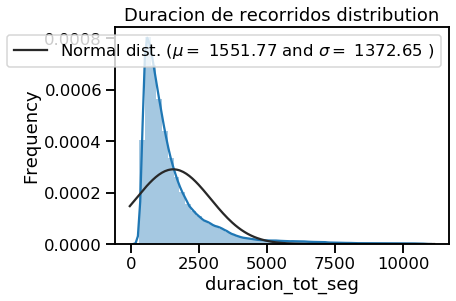

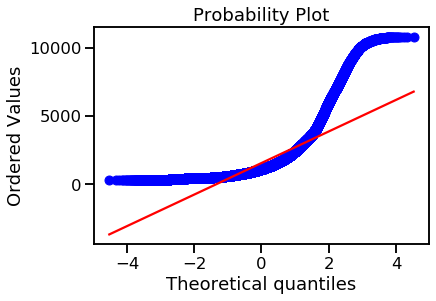

In [125]:
#Duracion de recorridos es la variable a predecir entonces vamos a graficar la distribucion de la misma 
#La distribucion de la misma a priori no es una normal
sns.distplot(recorridos_droppeado['duracion_tot_seg'] , fit=norm);
#Vamos a  ajustar la distribucion original que tienen los datos a una distribucion normal 
(mu, sigma) = norm.fit(recorridos_droppeado['duracion_tot_seg'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Vamos a plotear la distribution original y la normal 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Duracion de recorridos distribution')

# QQ-plot
#Con este grafico lo que se puede ver es que tan bien o que tan mal se ajusta la distribucion original de tus datos 
#a la otra distribucion que estas probando, que en este caso es normal 
fig = plt.figure()
res = stats.probplot(recorridos_droppeado['duracion_tot_seg'], plot=plt)
plt.show()

In [126]:
##Nos dimos cuenta que de esta manera no se ajusta bien a una normal , por lo que vamos a pasar la columna de duracion de 
#recorrido a una escala logaritmica

##Luego vamos a volver a pasarla a fittearla a distribucion normal y plottear


 mu = 7.09 and sigma = 0.67



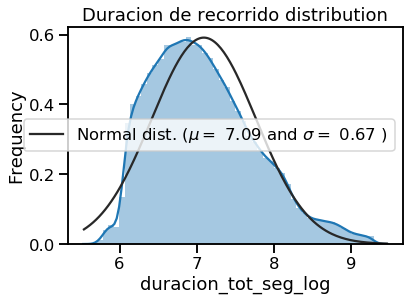

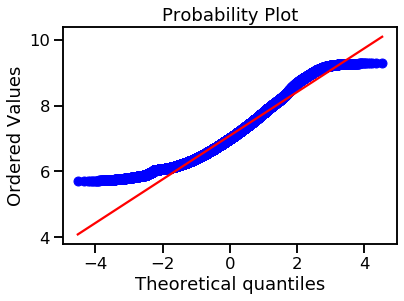

In [127]:
#Pasamos a logaritmica la columan de duracion de recorrido
recorridos_droppeado["duracion_tot_seg_log"] = np.log1p(recorridos_droppeado["duracion_tot_seg"])

#Fiteamos a normal
sns.distplot(recorridos_droppeado['duracion_tot_seg_log'] , fit=norm);

#Obtenemos los parametros de la normal(mu, sigma)
(mu, sigma) = norm.fit(recorridos_droppeado['duracion_tot_seg_log'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Ploteamos la distribucion
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Duracion de recorrido distribution')

#QQ-plot para analizar que tan bien o que tan mal se adapta la "duracion de recorridos" 
#a una distribucion normal 
fig = plt.figure()
res = stats.probplot(recorridos_droppeado['duracion_tot_seg_log'], plot=plt)
plt.show()

In [128]:
#vamos a ver cuales son los outliers para droppearlos

In [129]:
#Vemos la cantidad de recorridos con duracin menor a 5 min
recorridos_loc_izquierda = recorridos_droppeado[recorridos_droppeado['duracion_tot_seg'] <= 300]

In [130]:
recorridos_loc_izquierda.shape

(0, 34)

In [131]:
#Como son muy poco recorridos, los dejamos


In [132]:
recorridos_droppeado['duracion_tot_seg'].dtype

dtype('int64')

In [133]:
#Ahora vemos los outliers a la derecha de la curva, es decir, los recorridos con duracion 
#mayor a dos horas y media ya dos horas es el limite de utilizacion de ecobici actual

In [134]:
recorridos_loc_derecha = recorridos_droppeado[recorridos_droppeado['duracion_tot_seg'] >= 9000]
recorridos_loc_derecha.shape

(968, 34)

In [135]:
#Dropeamos estas samples

In [136]:
recorridos_final = recorridos_droppeado.drop(recorridos_droppeado[(recorridos_droppeado['duracion_tot_seg'] >= 9000)].index)

In [137]:
recorridos_final.shape

(229837, 34)

In [138]:
recorridos_final = recorridos_droppeado.drop(columns=['duracion_tot_seg',])

Armado de modelo de regresión


In [139]:
#Chequeamos tener la duracion de recorridos al final del dataset, ya que es nuestra "etiqueta" a predecir

In [140]:
recorridos_final.columns

Index([          'lat_origen',          'long_origen',          'lat_destino',
               'long_destino',               'DiaLab',         'usuario_edad',
                          'F',                    'M',                      0,
                            1,                      2,                      3,
                            4,                      5,                      6,
                            7,                      8,                      9,
                           10,                     11,                     12,
                           13,                     14,                     15,
                           16,                     17,                     18,
                           19,                     20,                     21,
                           22,                     23, 'duracion_tot_seg_log'],
      dtype='object')

In [141]:
recorridos_final = recorridos_final[['lat_origen', 'long_origen', 'lat_destino','long_destino', 'usuario_edad','DiaLab', 'F', 'M',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
       'duracion_tot_seg_log']]

In [142]:
recorridos_final.columns

Index([          'lat_origen',          'long_origen',          'lat_destino',
               'long_destino',         'usuario_edad',               'DiaLab',
                          'F',                    'M',                      0,
                            1,                      2,                      3,
                            4,                      5,                      6,
                            7,                      8,                      9,
                           10,                     11,                     12,
                           13,                     14,                     15,
                           16,                     17,                     18,
                           19,                     20,                     21,
                           22,                     23, 'duracion_tot_seg_log'],
      dtype='object')

In [143]:
##Importamos librerias para los modelos 

#SK-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
#Scalers
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Modelos Lineales
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
#Metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [144]:
#Modelos Lineales
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
#Metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [145]:
#Declaramos las variables x: todas las features que le mandamos al modelo 
#y: la variable a predecir, que es la duracion del recorrido (ultima columna del dataset)
x = recorridos_final.iloc[:,:-1].values
y = recorridos_final.iloc[:,-1].values
print(x.shape,y.shape)

(230805, 32) (230805,)


In [146]:
# Separamos set de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.95, random_state=1)
# Separamos el set X con las features polinomicas (el set Y ya fue separado en la linea anterior) 
x_poly_train, x_poly_test = train_test_split(x, test_size=0.95, random_state=1)

In [147]:
#Pasamos a dataframe
x_poly_train= pd.DataFrame(x_poly_train)
x_poly_test = pd.DataFrame(x_poly_test)

In [148]:
#Separamos el x_train y el x_test, en la parte de dummies y en la parte de features continuas
# para luego solo escalar las continuas
x_poly_train_dummies =x_poly_train.iloc[:,-27:]
x_poly_test_dummies =x_poly_test.iloc[:,-27:]

x_dummies_train= pd.DataFrame(x_poly_train_dummies)
x_dummies_test= pd.DataFrame(x_poly_test_dummies)

In [149]:
#Pasamos a dataframe
x_train= pd.DataFrame(x_train, columns=[          'lat_origen',          'long_origen',          'lat_destino',
               'long_destino',         'usuario_edad',               'DiaLab',
                          'F',                    'M',                  
                            0,                      1,                      2,
                            3,                      4,                      5,
                            6,                      7,                      8,
                            9,                     10,                     11,
                           12,                     13,                     14,
                           15,                     16,                     17,
                           18,                     19,                     20,
                           21,                     22,                     23])
x_test= pd.DataFrame(x_test, columns=[          'lat_origen',          'long_origen',          'lat_destino',
               'long_destino',         'usuario_edad',               'DiaLab',
                          'F',                    'M',                  
                            0,                      1,                      2,
                            3,                      4,                      5,
                            6,                      7,                      8,
                            9,                     10,                     11,
                           12,                     13,                     14,
                           15,                     16,                     17,
                           18,                     19,                     20,
                           21,                     22,                     23])

In [150]:
# Definimos el escalador 
scaler = MinMaxScaler()
# Fiteamos para los x_train
scaler = scaler.fit(x_train.iloc[:, :-27])

In [151]:
#Transformamos a x_train y x_test con el escalador ya fitteado por el train (solo features continuas)
x_train_scaled =scaler.transform(x_train.iloc[:, :-27])
x_test_scaled = scaler.transform(x_test.iloc[:, :-27])

In [152]:
#Pasamos a dataframe
x_train_scaled= pd.DataFrame(x_train_scaled, columns=['lat_origen',          'long_origen',          'lat_destino',
               'long_destino',         'usuario_edad'])
x_test_scaled= pd.DataFrame(x_test_scaled, columns=['lat_origen',          'long_origen',          'lat_destino',
               'long_destino',         'usuario_edad'])

In [153]:
x_test_scaled.head()

,lat_origen,long_origen,lat_destino,long_destino,usuario_edad
0,0.248484,0.432661,0.498389,0.398701,0.397059
1,0.592183,0.703322,0.662618,0.436612,0.411765
2,0.828835,0.346197,0.286206,0.818922,0.558824
3,0.258615,0.478705,0.501643,0.827055,0.294118
4,0.430736,0.492966,0.346592,0.659284,0.102941


In [154]:
x_train_scaled_2= pd.concat([x_train_scaled,x_dummies_train],axis = 1)

x_test_scaled_2= pd.concat([x_test_scaled,x_dummies_test],axis = 1)

In [155]:
#Luego de escalar los datos agrego las features polinomicas
grad_poly = 5
x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_poly_train.iloc[:, :-27])
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_poly_test.iloc[:, :-27])

In [156]:
#Paso a dataframe
x_train_poly_scaled= pd.DataFrame(x_train_poly_scaled)
x_test_poly_scaled= pd.DataFrame(x_test_poly_scaled)

In [157]:
x_poly_train_scaled_2= pd.concat([x_train_poly_scaled,x_dummies_train],axis = 1)

x_poly_test_scaled_2= pd.concat([x_test_poly_scaled,x_dummies_test],axis = 1)


In [158]:
x_test_scaled_2.head()

,lat_origen,long_origen,lat_destino,long_destino,usuario_edad,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0.248484,0.432661,0.498389,0.398701,0.397059,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.592183,0.703322,0.662618,0.436612,0.411765,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.828835,0.346197,0.286206,0.818922,0.558824,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.258615,0.478705,0.501643,0.827055,0.294118,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.430736,0.492966,0.346592,0.659284,0.102941,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
#creamos vector de resultados
results_df = pd.DataFrame(columns=['Model','Features','R2','MSE','MAE'])

In [160]:
#Definimos el estimador
est = LinearRegression()

In [161]:
#Definimos diccionario con hyperparametros
parameters = {'fit_intercept' : [False, True]}
#Definimos la cantidad de folds para validar
n_folds = 5
#Definimos el objeto grid search con los parametros anteriores
gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, refit=True, scoring="neg_mean_squared_error")

In [162]:
#Comenzamos el grid search
gs.fit(x_train_scaled_2, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'fit_intercept': [False, True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [163]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

{'fit_intercept': True} 

-0.4421041845183204 



In [164]:
# Usamos x_test para predecir con el mejor estimador
linear_prediction = gs.best_estimator_.predict(x_test_scaled_2)
#Calculamos las metricas R2, MSE y MAE
linear_r2 = r2_score(y_true=y_test, y_pred=linear_prediction)
linear_mse = mean_squared_error(y_true=y_test, y_pred=linear_prediction)
linear_mae = mean_absolute_error(y_true=y_test, y_pred=linear_prediction)

R2 score: 0.042368
MAE: 0.435771
MSE: 0.534492


<function print>

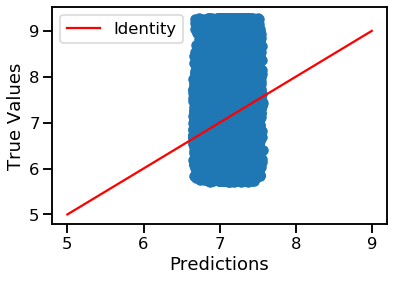

In [165]:
#Vamos a plotear Predictions vs True values
plt.scatter(linear_prediction, y_test)
plt.plot(np.arange(5,10),np.arange(5,10), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {linear_r2:.6f}')
print(f'MAE: {linear_mse:.6f}')
print(f'MSE: {linear_mae:.6f}')
print 

In [166]:
results_df = pd.DataFrame(columns=['Model','Features','R2','MSE','MAE'])

In [167]:
#Guardamos los resultados
results_df = results_df.append({'Model':'Linear',
                                'Features':'Lineal',
                                'R2':linear_r2,
                                'MSE':linear_mse,
                                'MAE':linear_mae},ignore_index=True)

In [168]:
#Motramos los resultados del modelo lineal para features lineales
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.042368,0.435771,0.534492


Ahora probamos modelo lineal para features polinomicas

In [169]:
#Usamos los mismos parametros para este nuevo GS.
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
#Entrenamos
gs.fit(x_poly_train_scaled_2, y_train)
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

{'fit_intercept': True} 

-0.3900548256969466 



In [170]:
# Predecimos para el set polinomico
poly_linear_prediction = gs.best_estimator_.predict(x_poly_test_scaled_2)
# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test, y_pred=poly_linear_prediction)

R2 score: 0.163675
MAE: 0.380570
MSE: 0.472231


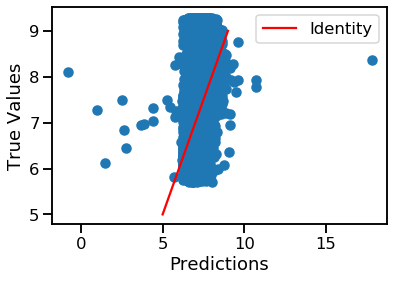

In [171]:
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(5,10),np.arange(5,10), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_linear_r2:.6f}')
print(f'MAE: {poly_linear_mse:.6f}')
print(f'MSE: {poly_linear_mae:.6f}')

In [172]:
results_df = results_df.append({'Model':'Linear',
                                'Features':'Poly grado 5',
                                'R2':poly_linear_r2,
                                'MSE':poly_linear_mse,
                                'MAE':poly_linear_mae},ignore_index=True)

In [173]:
#Mostramos resultados de modelo lineal con lineales y con polinomicas
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.042368,0.435771,0.534492
1,Linear,Poly grado 5,0.163675,0.380570,0.472231


In [174]:
#Vamos a probar con grado 4
grad_poly = 4
x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_poly_train.iloc[:, :-27])
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_poly_test.iloc[:, :-27])

In [175]:
#Paso a dataframe
x_train_poly_scaled= pd.DataFrame(x_train_poly_scaled)
x_test_poly_scaled= pd.DataFrame(x_test_poly_scaled)

In [176]:
x_poly_train_scaled_2= pd.concat([x_train_poly_scaled,x_dummies_train],axis = 1)

x_poly_test_scaled_2= pd.concat([x_test_poly_scaled,x_dummies_test],axis = 1)

In [177]:
#Usamos los mismos parametros para este nuevo GS.
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
#Entrenamos
gs.fit(x_poly_train_scaled_2, y_train)
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False) 

{'fit_intercept': False} 

-0.3869886699231677 



In [178]:
# Predecimos para el set polinomico
poly_linear_prediction = gs.best_estimator_.predict(x_poly_test_scaled_2)
# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test, y_pred=poly_linear_prediction)

R2 score: 0.172195
MAE: 0.376693
MSE: 0.470192


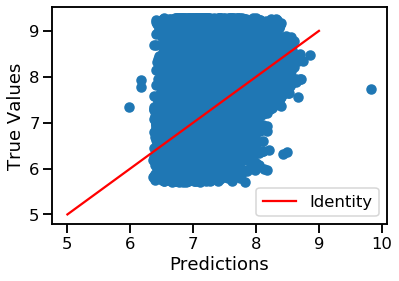

In [179]:
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(5,10),np.arange(5,10), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_linear_r2:.6f}')
print(f'MAE: {poly_linear_mse:.6f}')
print(f'MSE: {poly_linear_mae:.6f}')

In [180]:
results_df = results_df.append({'Model':'Linear',
                                'Features':'Poly grado 4',
                                'R2':poly_linear_r2,
                                'MSE':poly_linear_mse,
                                'MAE':poly_linear_mae},ignore_index=True)

In [181]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.042368,0.435771,0.534492
1,Linear,Poly grado 5,0.163675,0.380570,0.472231
2,Linear,Poly grado 4,0.172195,0.376693,0.470192


In [182]:
#Vamos a probar con grado 3
grad_poly = 3
x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_poly_train.iloc[:, :-27])
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_poly_test.iloc[:, :-27])

In [183]:
#Paso a dataframe
x_train_poly_scaled= pd.DataFrame(x_train_poly_scaled)
x_test_poly_scaled= pd.DataFrame(x_test_poly_scaled)

In [184]:
x_poly_train_scaled_2= pd.concat([x_train_poly_scaled,x_dummies_train],axis = 1)

x_poly_test_scaled_2= pd.concat([x_test_poly_scaled,x_dummies_test],axis = 1)

In [185]:
#Usamos los mismos parametros para este nuevo GS.
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
#Entrenamos
gs.fit(x_poly_train_scaled_2, y_train)
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

{'fit_intercept': True} 

-0.38956699788320853 



In [186]:
# Predecimos para el set polinomico
poly_linear_prediction = gs.best_estimator_.predict(x_poly_test_scaled_2)
# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test, y_pred=poly_linear_prediction)

R2 score: 0.164269
MAE: 0.380300
MSE: 0.476334


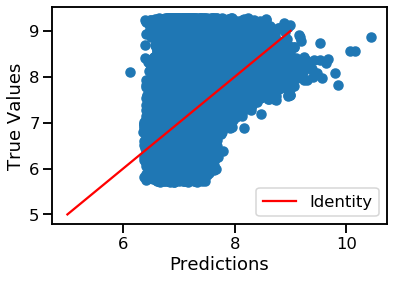

In [187]:
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(5,10),np.arange(5,10), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_linear_r2:.6f}')
print(f'MAE: {poly_linear_mse:.6f}')
print(f'MSE: {poly_linear_mae:.6f}')

In [188]:
results_df = results_df.append({'Model':'Linear',
                                'Features':'Poly grado 3',
                                'R2':poly_linear_r2,
                                'MSE':poly_linear_mse,
                                'MAE':poly_linear_mae},ignore_index=True)

In [189]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.042368,0.435771,0.534492
1,Linear,Poly grado 5,0.163675,0.380570,0.472231
2,Linear,Poly grado 4,0.172195,0.376693,0.470192
3,Linear,Poly grado 3,0.164269,0.380300,0.476334


In [190]:
#Vamos a probar con grado 2
grad_poly = 2
x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_poly_train.iloc[:, :-27])
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_poly_test.iloc[:, :-27])

In [191]:
#Paso a dataframe
x_train_poly_scaled= pd.DataFrame(x_train_poly_scaled)
x_test_poly_scaled= pd.DataFrame(x_test_poly_scaled)

In [192]:
x_poly_train_scaled_2= pd.concat([x_train_poly_scaled,x_dummies_train],axis = 1)

x_poly_test_scaled_2= pd.concat([x_test_poly_scaled,x_dummies_test],axis = 1)

In [193]:
#Usamos los mismos parametros para este nuevo GS.
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
#Entrenamos
gs.fit(x_poly_train_scaled_2, y_train)
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False) 

{'fit_intercept': False} 

-0.3892123333970431 



In [194]:
# Predecimos para el set polinomico
poly_linear_prediction = gs.best_estimator_.predict(x_poly_test_scaled_2)
# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test, y_pred=poly_linear_prediction)

R2 score: 0.164721
MAE: 0.380094
MSE: 0.476191


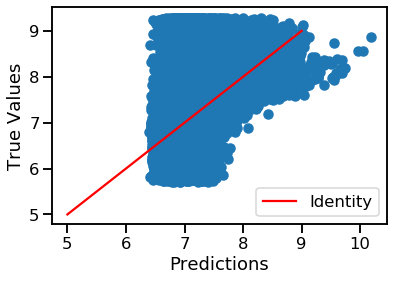

In [195]:
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(5,10),np.arange(5,10), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_linear_r2:.6f}')
print(f'MAE: {poly_linear_mse:.6f}')
print(f'MSE: {poly_linear_mae:.6f}')

In [196]:
results_df = results_df.append({'Model':'Linear',
                                'Features':'Poly grado 2',
                                'R2':poly_linear_r2,
                                'MSE':poly_linear_mse,
                                'MAE':poly_linear_mae},ignore_index=True)

In [197]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.042368,0.435771,0.534492
1,Linear,Poly grado 5,0.163675,0.380570,0.472231
2,Linear,Poly grado 4,0.172195,0.376693,0.470192
3,Linear,Poly grado 3,0.164269,0.380300,0.476334
4,Linear,Poly grado 2,0.164721,0.380094,0.476191


Ahora armamos el modelo Ridge regresion con features lineales

In [198]:
# Ahora cambiamos el estimador, usaremos Ridge Regression
est = Ridge()
# Lista del parametro lambda (llamado 'alpha' en el GridSearch )
lambdas = [100,200,300,400,500]
# Juntamos el diccionario de parametros
parameters = {'alpha': lambdas}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs_1 = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")

In [199]:
# Entrenamos
gs_1.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [100, 200, 300, 400, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [200]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs_1.best_estimator_, "\n")
print(gs_1.best_params_, "\n")
print(gs_1.best_score_, "\n")

Ridge(alpha=400, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 

{'alpha': 400} 

-0.45800654537961716 



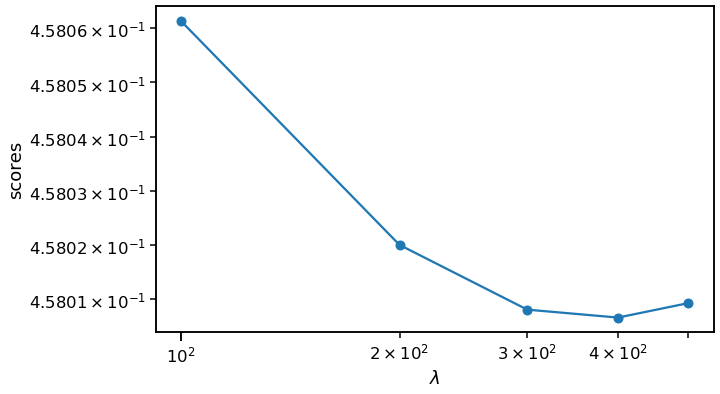

In [201]:
# Vamos a plotear nuestro parametro lambda vs. el score
fit_lambdas = [d['alpha'] for d in gs_1.cv_results_['params']]
fit_scores = gs_1.cv_results_['mean_test_score']
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');

In [202]:
#Predicciones + Metricas
ridge_prediction = gs_1.best_estimator_.predict(x_test_scaled)
ridge_r2 = r2_score(y_true=y_test, y_pred=ridge_prediction)
ridge_mse = mean_squared_error(y_true=y_test, y_pred=ridge_prediction)
ridge_mae = mean_absolute_error(y_true=y_test, y_pred=ridge_prediction)

R2 score: 0.001011
MAE: 0.454591
MSE: 0.544708


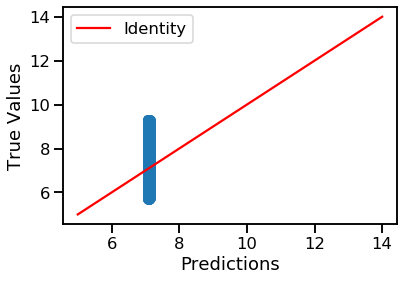

In [203]:
# Plots
plt.scatter(ridge_prediction, y_test)
plt.plot(np.arange(5,15),np.arange(5,15), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {ridge_r2:.6f}')
print(f'MAE: {ridge_mse:.6f}')
print(f'MSE: {ridge_mae:.6f}')

In [204]:
#Guardamos resultados
results_df = results_df.append({'Model':'Ridge',
                                'Features':'Lineal',
                                'R2':ridge_r2,
                                'MSE':ridge_mse,
                                'MAE':ridge_mae},ignore_index=True)

In [205]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.042368,0.435771,0.534492
1,Linear,Poly grado 5,0.163675,0.380570,0.472231
2,Linear,Poly grado 4,0.172195,0.376693,0.470192
3,Linear,Poly grado 3,0.164269,0.380300,0.476334
4,Linear,Poly grado 2,0.164721,0.380094,0.476191
5,Ridge,Lineal,0.001011,0.454591,0.544708


In [206]:
#Definimos estimador
est = Ridge()

gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
gs.fit(x_train_poly_scaled, y_train)
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

Ridge(alpha=500, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 

{'alpha': 500} 

-0.45793926002582447 



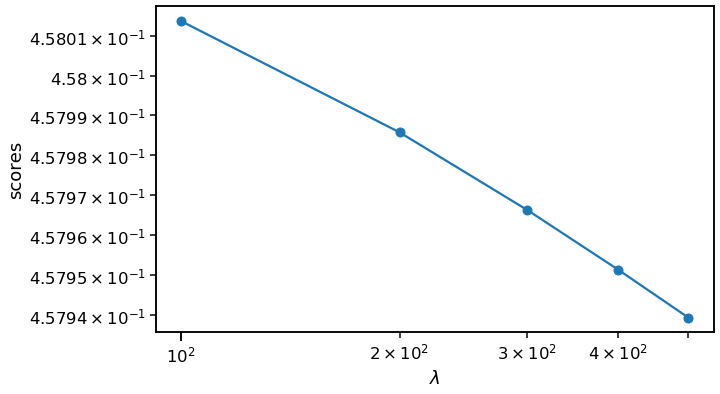

In [207]:
# Vamos a plotear nuestro parametro lambda vs el score
fit_lambdas = [d['alpha'] for d in gs.cv_results_['params']]
fit_scores = gs.cv_results_['mean_test_score']
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');

In [208]:
# Prediccion + Metricas
poly_ridge_prediction = gs.best_estimator_.predict(x_test_poly_scaled)
poly_ridge_r2 = r2_score(y_true=y_test, y_pred=poly_ridge_prediction)
poly_ridge_mse = mean_squared_error(y_true=y_test, y_pred=poly_ridge_prediction)
poly_ridge_mae = mean_absolute_error(y_true=y_test, y_pred=poly_ridge_prediction)

R2 score: 0.002011
MAE: 0.454135
MSE: 0.544160


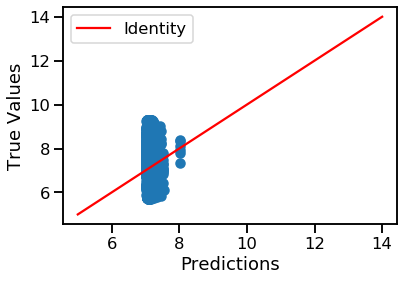

In [209]:
# Plots
plt.scatter(poly_ridge_prediction, y_test)
plt.plot(np.arange(5,15),np.arange(5,15), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_ridge_r2:.6f}')
print(f'MAE: {poly_ridge_mse:.6f}')
print(f'MSE: {poly_ridge_mae:.6f}')

In [210]:
# Guardamos
results_df = results_df.append({'Model':'Ridge',
                                'Features':'Poly',
                                'R2':poly_ridge_r2,
                                'MSE':poly_ridge_mse,
                                'MAE':poly_ridge_mae},ignore_index=True)

In [211]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.042368,0.435771,0.534492
1,Linear,Poly grado 5,0.163675,0.380570,0.472231
2,Linear,Poly grado 4,0.172195,0.376693,0.470192
3,Linear,Poly grado 3,0.164269,0.380300,0.476334
4,Linear,Poly grado 2,0.164721,0.380094,0.476191
5,Ridge,Lineal,0.001011,0.454591,0.544708
6,Ridge,Poly,0.002011,0.454135,0.544160


In [212]:
# Ahora cambiamos el estimador, usaremos SVR
est = SVR(max_iter=25000)
# Lista del parametro lambda (parametro 'alpha')
parameters = {'C' : [900,1000],
              'epsilon' : [ 0.01, 0.1],
             'gamma':[ 0.01, 0.1]}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [213]:
# Entrenamos
gs.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  2.5min
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:  8.3min
[Parallel(n_jobs=3)]: Done 900 out of 900 | elapsed: 40.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=25000, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=3,
             param_grid={'C': [1000, 1500, 2000, 3000, 5000],
                         'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [214]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=25000, shrinking=True, tol=0.001, verbose=False) 

{'C': 1000, 'epsilon': 0.1, 'gamma': 0.01} 

-0.42344032107687984 



In [215]:
# Prediccion + Metricas
svr_prediction = gs.best_estimator_.predict(x_test_scaled)
svr_r2 = r2_score(y_true=y_test, y_pred=svr_prediction)
svr_mse = mean_squared_error(y_true=y_test, y_pred=svr_prediction)
svr_mae = mean_absolute_error(y_true=y_test, y_pred=svr_prediction)

R2 score: 0.087013
MAE: 0.415455
MSE: 0.473109


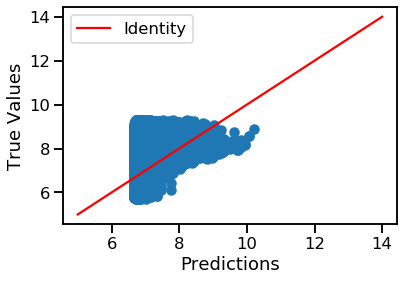

In [216]:
plt.scatter(svr_prediction, y_test)
plt.plot(np.arange(5,15),np.arange(5,15), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {svr_r2:.6f}')
print(f'MAE: {svr_mse:.6f}')
print(f'MSE: {svr_mae:.6f}')

In [217]:
results_df = results_df.append({'Model':'SVR',
                                'Features':'Linear',
                                'R2':svr_r2,
                                'MSE':svr_mse,
                                'MAE':svr_mae},ignore_index=True)

In [218]:
results_df 

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.042368,0.435771,0.534492
1,Linear,Poly grado 5,0.163675,0.380570,0.472231
2,Linear,Poly grado 4,0.172195,0.376693,0.470192
3,Linear,Poly grado 3,0.164269,0.380300,0.476334
4,Linear,Poly grado 2,0.164721,0.380094,0.476191
5,Ridge,Lineal,0.001011,0.454591,0.544708
6,Ridge,Poly,0.002011,0.454135,0.544160
7,SVR,Linear,0.087013,0.415455,0.473109


In [219]:
#Vamos con poly svr
grad_poly = 4
x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_train_scaled)
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_test_scaled)

In [220]:
x_test_poly_scaled.shape

(219265, 126)

In [221]:
est = SVR(kernel='rbf',max_iter=25000)
parameters = {'C' : [500,1000,1500,2000],
              'epsilon' : [0.001, 0.01,1,100],
             'gamma':[0.01,0.1, 10,100]}

gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, scoring="neg_mean_squared_error",
                  n_jobs=5,verbose=3,refit=True)
gs.fit(x_train_poly_scaled, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:  5.6min
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed: 20.6min
[Parallel(n_jobs=5)]: Done 278 tasks      | elapsed: 43.1min
[Parallel(n_jobs=5)]: Done 320 out of 320 | elapsed: 44.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=25000, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=5,
             param_grid={'C': [500, 1000, 1500, 2000],
                         'epsilon': [0.001, 0.01, 1, 100],
                         'gamma': [0.01, 0.1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [222]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

SVR(C=500, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.01,
    kernel='rbf', max_iter=25000, shrinking=True, tol=0.001, verbose=False) 

{'C': 500, 'epsilon': 0.01, 'gamma': 0.01} 

-0.431828775062384 



In [223]:
#Prediccion + Metricas
poly_svr_prediction = gs.best_estimator_.predict(x_test_poly_scaled)
poly_svr_r2 = r2_score(y_true=y_test, y_pred=poly_svr_prediction)
poly_svr_mse = mean_squared_error(y_true=y_test, y_pred=poly_svr_prediction)
poly_svr_mae = mean_absolute_error(y_true=y_test, y_pred=poly_svr_prediction)

R2 score: 0.030624
MAE: 0.441115
MSE: 0.469420


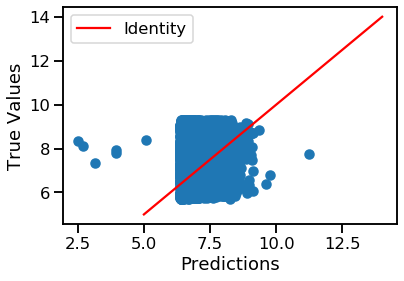

In [224]:
#Plot
plt.scatter(poly_svr_prediction, y_test)
plt.plot(np.arange(5,15),np.arange(5,15), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_svr_r2:.6f}')
print(f'MAE: {poly_svr_mse:.6f}')
print(f'MSE: {poly_svr_mae:.6f}')

In [225]:
#Guardamos
results_df = results_df.append({'Model':'SVR',
                                'Features':'Poly',
                                'R2':poly_svr_r2,
                                'MSE':poly_svr_mse,
                                'MAE':poly_svr_mae},ignore_index=True)

In [226]:
#Resultados finales
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Para acotar los decimales en pandas
display(results_df)

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.042,0.436,0.534
1,Linear,Poly grado 5,0.164,0.381,0.472
2,Linear,Poly grado 4,0.172,0.377,0.470
3,Linear,Poly grado 3,0.164,0.380,0.476
4,Linear,Poly grado 2,0.165,0.380,0.476
5,Ridge,Lineal,0.001,0.455,0.545
6,Ridge,Poly,0.002,0.454,0.544
7,SVR,Linear,0.087,0.415,0.473
8,SVR,Poly,0.031,0.441,0.469


El mejor modelo es el polinomial de grado 4, pero de todas maneras no nos explica la duracion del recorrido de biciletas ya que nos da un valor de R cuadrado menor del 20%. POr lo que podemos asumir dos puntos: 


- Podriamos estar eligiendo mal las features que nos predicen la duracion

- Los modelos de regresion elegidos no pueden resolver la problematica planteada



